In [101]:
import numpy as np
import matplotlib.pyplot as plt


In [102]:
# editable variables
Tt = 297  # degrees Kelvin

# Set e1 and e2
mu1 = 0  # mean of e1
mu2 = 0  # mean of e2
sigma1 = 1  # standard deviation of e1
sigma2 = 2  # standard deviation of e2
nsamples = 1000  # number of samples (realization)

In [103]:
# generate nsamples of e1 and e2 given their characteristics
np.random.seed(1)  # for reproducibility
e1 = mu1 + sigma1 * np.random.randn(nsamples)
e2 = mu2 + sigma2 * np.random.randn(nsamples)

# generate nsamples of T1 and T2 (our observations)
T1 = Tt + e1
T2 = Tt + e2

Text(0.5, 1.0, 'Histogram of T2')

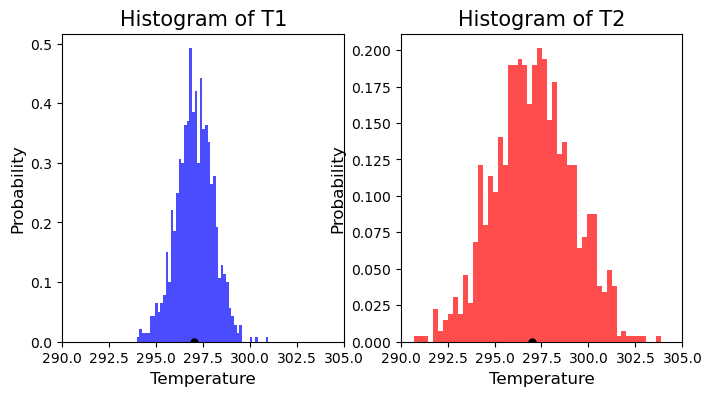

In [104]:
# Diagnostics
# check histogram of T1 & T2
plt.figure(1, figsize=(8, 4))

plt.subplot(1, 2, 1)
n1, x1, _ = plt.hist(T1, bins=50, density=True, color='blue', alpha=0.7)
plt.plot(Tt, 0, 'k.', markersize=10)
plt.xlim(290, 305)
#plt.ylim([0, 0.1])
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of T1', fontsize=15)

plt.subplot(1, 2, 2)
n2, x2, _ = plt.hist(T2, bins=50, density=True, color='red', alpha=0.7)
plt.plot(Tt, 0, 'k.', markersize=10)
plt.xlim(290, 305)
#plt.ylim([0, 0.1])
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of T2', fontsize=15)



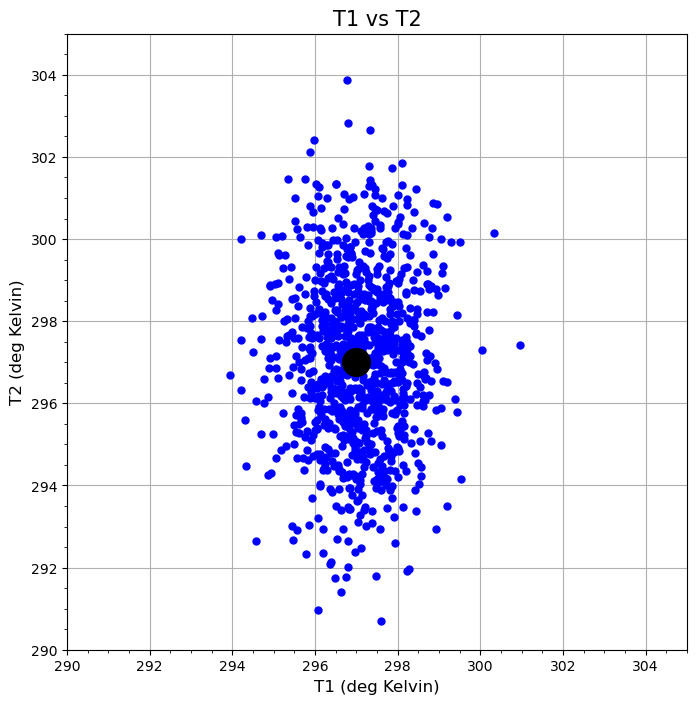

In [105]:
plt.figure(2, figsize=(8, 8))
plt.plot(T1, T2, 'b.', markersize=10)
plt.plot(Tt, Tt, 'k.', markersize=40)
plt.xlim(290, 305)
plt.ylim(290, 305)
plt.grid(True)
plt.xlabel('T1 (deg Kelvin)', fontsize=12)
plt.ylabel('T2 (deg Kelvin)', fontsize=12)
plt.title('T1 vs T2', fontsize=15)
plt.minorticks_on()
plt.show()

In [106]:
# check statistics

print('Mean and Std Deviation of e1')
print([np.mean(e1), np.std(e1)])
print('Mean and Std Deviation of e2')
print([np.mean(e2), np.std(e2)])
print('Correlation between T1 and T2')
print(np.corrcoef(T1, T2)[0, 1])

Mean and Std Deviation of e1
[0.038812476159601844, 0.9810041339322116]
Mean and Std Deviation of e2
[0.05465088678915608, 2.0600748564339146]
Correlation between T1 and T2
0.021856951028048806


In [107]:
# Estimate the true temperature as a linear combination of 2 pieces of information
inf = 1
sigma2a = sigma2 * inf

a1 = sigma2a**2 / (sigma1**2 + sigma2a**2)
a2 = sigma1**2 / (sigma1**2 + sigma2a**2)

Ta = a1 * T1 + a2 * T2
sigmaa = np.sqrt((sigma1**2 * sigma2**2) / (sigma1**2 + sigma2**2))

print('a1, a2, and sigmaa')
print([a1, a2, sigmaa])

a1, a2, and sigmaa
[0.8, 0.2, 0.8944271909999159]


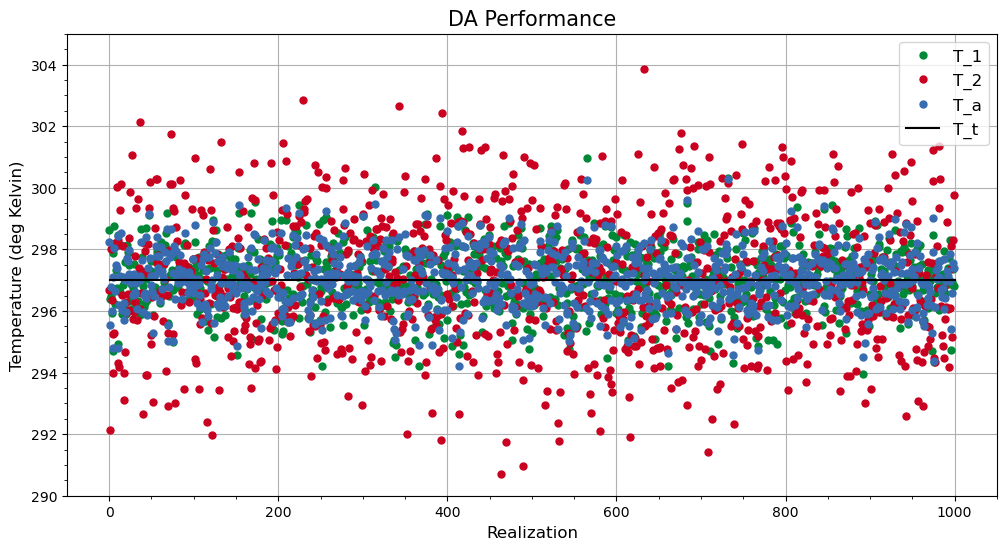

In [108]:
# Diagnostics
plt.figure(3, figsize=(12, 6))
colors = [(0, 136, 55), (202, 0, 32), (56, 108, 176)]
C = np.array(colors) / 255.0
plt.plot(T1, '.', color=C[0], markersize=10)
plt.plot(T2, '.', color=C[1], markersize=10)
plt.plot(Ta, '.', color=C[2], markersize=10)
plt.plot(np.arange(1, len(Ta) + 1), Tt * np.ones(len(Ta)), 'k-')
plt.ylim([290, 305])
plt.grid(True)
plt.xlabel('Realization', fontsize=12)
plt.ylabel('Temperature (deg Kelvin)', fontsize=12)
plt.legend(['T_1', 'T_2', 'T_a', 'T_t'], loc='best', fontsize=12)
plt.minorticks_on()
plt.title('DA Performance', fontsize=15)
plt.show()

In [109]:
# Check if our estimate is more accurate
print('T1, T2, Ta, Tt')
print([np.mean(T1), np.mean(T2), np.mean(Ta), Tt])
print('Root mean square errors for T1, T2, and Ta')
print([np.sqrt(np.mean((T1 - Tt)**2)), np.sqrt(np.mean((T2 - Tt)**2)), np.sqrt(np.mean((Ta - Tt)**2))])

# Find coefficients using covariances
X = np.column_stack((T1, T2))
Y = Ta
b1 = np.cov(X[:, 0], Y)[0, 1] / np.var(X[:, 0])
b2 = np.cov(X[:, 1], Y)[0, 1] / np.var(X[:, 1])


print('b1, b2')
print([b1, b2])

T1, T2, Ta, Tt
[297.0388124761596, 297.05465088678915, 297.04198015828547, 297]
Root mean square errors for T1, T2, and Ta
[0.9817716226789863, 2.0607996344958077, 0.895304318384425]
b1, b2
[0.8099897584655976, 0.20853512937781654]


## Slider

In [110]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

In [111]:
@interact
def all(Tt=fixed(297),
        mu1=fixed(0),
        mu2=fixed(0),
        sigma1=FloatSlider(min=0.1, max=5, step=0.1, value=1),
        sigma2=FloatSlider(min=0.1, max=5, step=0.1, value=2),
        nsamples=IntSlider(min=50, max=5000, step=50, value=1000),
        inf = FloatSlider(min=0.1, max=2, step=0.1, value=1),):

    np.random.seed(1)  # for reproducibility
    e1 = mu1 + sigma1 * np.random.randn(nsamples)
    e2 = mu2 + sigma2 * np.random.randn(nsamples)

    # generate nsamples of T1 and T2 (our observations)
    T1 = Tt + e1
    T2 = Tt + e2

    minn,maxx = np.nanpercentile([T1 + e1,T2+ e2],[1,99])

    # Diagnostics
    # check histogram of T1 & T2
    plt.figure(1, figsize=(15, 2))
    plt.subplot(1, 3, 1)
    n1, x1, _ = plt.hist(T1, bins=25, density=True, color='blue', alpha=0.7, histtype='step')
    plt.plot(Tt, 0, c='k', markersize=50)
    plt.axvline(Tt, c='b',lw=2)
    plt.xlim(minn, maxx)
    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title('Histogram of T1', fontsize=15)

    plt.subplot(1, 3, 2)
    n2, x2, _ = plt.hist(T2, bins=25, density=True, color='red', alpha=0.7, histtype='step')
    plt.plot(Tt, 0, c='k', markersize=50)
    plt.xlim(minn, maxx)
    plt.axvline(Tt, c='r',lw=2)
    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title('Histogram of T2', fontsize=15)

    plt.subplot(1,3,3)
    plt.scatter(T1, T2, c='g', s=10, alpha=0.8)
    plt.scatter(Tt, Tt, c='k', s=50)
    plt.xlim(minn, maxx)
    plt.ylim(minn, maxx)
    plt.grid(True)
    plt.xlabel('T1 (deg Kelvin)', fontsize=12)
    plt.ylabel('T2 (deg Kelvin)', fontsize=12)
    rho = (np.corrcoef(T1, T2)[0, 1])

    plt.title(f'T1 vs T2 \n'+rf'$\rho$ = {rho:0.2f}', fontsize=15)
    plt.axline((0,0),slope=1,c='dimgrey',ls='--')

    plt.show()


    # Estimate the true temperature as a linear combination of 2 pieces of information
    # Let's assume sigma2 is unknown.
    #inf = 1
    sigma2a = sigma2 * inf

    a1 = sigma2a**2 / (sigma1**2 + sigma2a**2)
    a2 = sigma1**2 / (sigma1**2 + sigma2a**2)

    Ta = a1 * T1 + a2 * T2
    sigmaa = np.sqrt((sigma1**2 * sigma2**2) / (sigma1**2 + sigma2**2))

    plt.figure(2, figsize=(15, 2))
    C = ['b','r','g']
    plt.plot(T1, '.', color=C[0], markersize=5)
    plt.plot(T2, '.', color=C[1], markersize=5)
    plt.plot(Ta, '.', color=C[2], markersize=5)
    plt.plot(np.arange(1, len(Ta) + 1), Tt * np.ones(len(Ta)), 'k-')
    plt.ylim(minn, maxx)
    plt.grid(True)
    plt.xlabel('Realization', fontsize=12)
    plt.ylabel('Temperature (deg Kelvin)', fontsize=12)
    plt.legend(['T_1', 'T_2', 'T_a', 'T_t'], loc='best', fontsize=12)
    plt.minorticks_on()
    plt.title('DA Performance', fontsize=15)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='sigma1', max=5.0, min=0.1), FloatSlider(value=2.0, d…